This is the python notebook that visualizes data. 
Before starting, we initialize packages to assist the visualization

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Before we start, we choose our datasets: Taiwan(twn), United States(usa), Belgium(bel), Japan(jpn), and China(chn)

In [4]:
twn_data = pd.read_csv("C:/Users/ericy/PycharmProjects/DATASCI-217/Assignment_6/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-twn--age--gender--year.csv")
usa_data = pd.read_csv("C:/Users/ericy/PycharmProjects/DATASCI-217/Assignment_6/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-usa--age--gender--year.csv")
bel_data = pd.read_csv("C:/Users/ericy/PycharmProjects/DATASCI-217/Assignment_6/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-bel--age--gender--year.csv")
jpn_data = pd.read_csv("C:/Users/ericy/PycharmProjects/DATASCI-217/Assignment_6/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-jpn--age--gender--year.csv")
chn_data = pd.read_csv("C:/Users/ericy/PycharmProjects/DATASCI-217/Assignment_6/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-chn--age--gender--year.csv")

## Part 1: Matplotlib

Calculate the total population by country for each year

In [5]:
df = pd.concat([twn_data, usa_data, bel_data, jpn_data, chn_data])
total_population = df.groupby(['country', 'year'])['population'].sum().reset_index()

Create a line plot showing population trends, Include a legend identifying each country, Add appropriate axis labels and title, and Use different line styles or colors to distinguish the countries

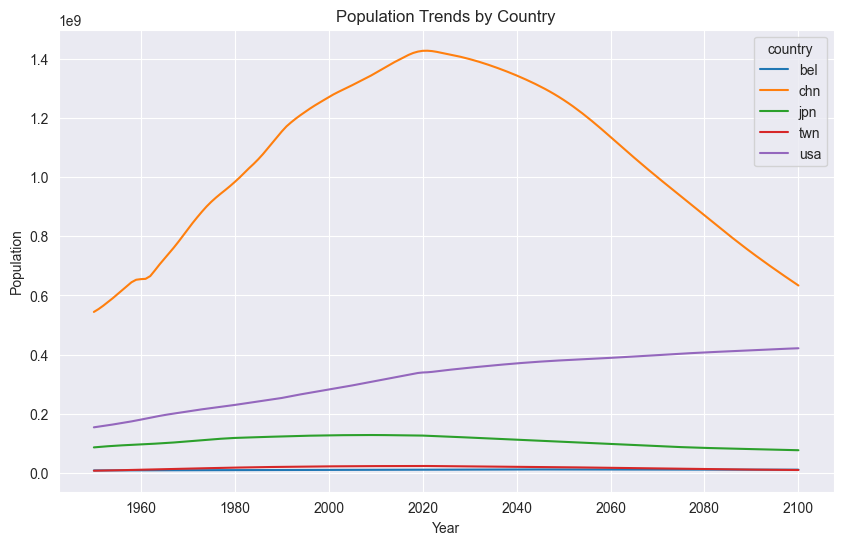

In [6]:
#Create a line plot showing population trends
plt.figure(figsize=(10, 6))
for country in total_population['country'].unique():
    country_data = total_population[total_population['country'] == country]
    plt.plot(country_data['year'], country_data['population'], label=country)
#Include a legend identifying each country
plt.legend(title="country")
plt.grid(True)
#Add appropriate axis labels and title
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population Trends by Country")
plt.show()
#Use different line styles or colors to distinguish the countries

Investigate demographic shifts using a stacked bar chart

C:\Users\ericy\AppData\Local\Temp\ipykernel_52140\1549445529.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['age_group'] = pd.cut(filtered['age'], bins=age_bins, labels=age_labels,include_lowest=True, right=True)
C:\Users\ericy\AppData\Local\Temp\ipykernel_52140\1549445529.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_distribution = filtered.groupby(['year', 'age_group'])['population'].sum().unstack(fill_value=0)
C:\Users\ericy\AppData\Local\Temp\ipykernel_52140\1549445529.py:17: FutureWarning: Series.__getitem__ treating keys as posi

<Figure size 1000x600 with 0 Axes>

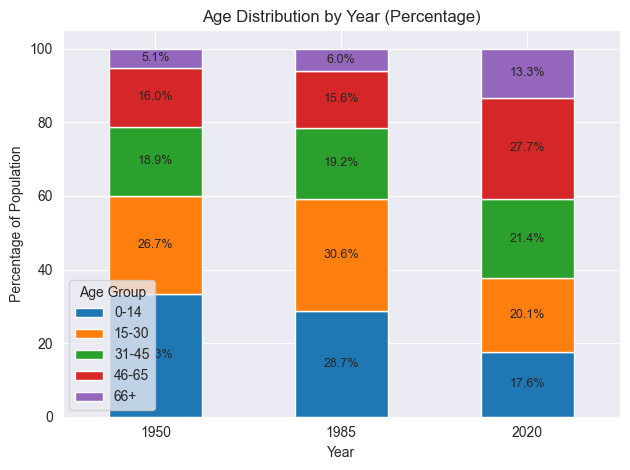

In [7]:
#Compare age distributions (0-14, 15-30, 31-45, 46-65, 66+) between 1950, 1985, and 2020
filtered = df[df['year'].isin([1950, 1985, 2020])]
age_bins = [0, 14, 30, 45, 65, 100]  
age_labels = ['0-14', '15-30', '31-45', '46-65', '66+']  
filtered['age_group'] = pd.cut(filtered['age'], bins=age_bins, labels=age_labels,include_lowest=True, right=True)
# Create a stacked bar chart
plt.figure(figsize=(10, 6))
age_distribution = filtered.groupby(['year', 'age_group'])['population'].sum().unstack(fill_value=0)
age_distribution_percentage = age_distribution.div(age_distribution.sum(axis=1), axis=0) * 100
age_distribution_percentage.plot(kind='bar', stacked=True)
#Calculate and display the percentage for each age group
#Add text annotations showing key percentages
for i in range(len(age_distribution_percentage)):
    for j, age_group in enumerate(age_distribution_percentage.columns):
        percentage = age_distribution_percentage.iloc[i, j]
        if percentage > 0:  
            plt.text(i, age_distribution_percentage.iloc[i, :].cumsum()[j] - percentage / 2,
                     f"{percentage:.1f}%", ha='center', va='center', fontsize=9)
#Include clear labels and a legend
plt.title("Age Distribution by Year (Percentage)")
plt.xlabel("Year")
plt.ylabel("Percentage of Population")
plt.xticks(rotation=0)
# Add legend
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()


## Part 2: Seaborn


Create a heatmap showing the population distribution across age groups (0-14, 15-30, 31-45, 46-65, 66+) and country for 5 countries of your choice in a specific year.



C:\Users\ericy\AppData\Local\Temp\ipykernel_52140\541684597.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['age_group'] = pd.cut(filtered['age'], bins=age_bins, labels=age_labels,include_lowest=True, right=True)
C:\Users\ericy\AppData\Local\Temp\ipykernel_52140\541684597.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_distribution = filtered.groupby(['country', 'age_group'])['population'].sum().unstack(fill_value=0)


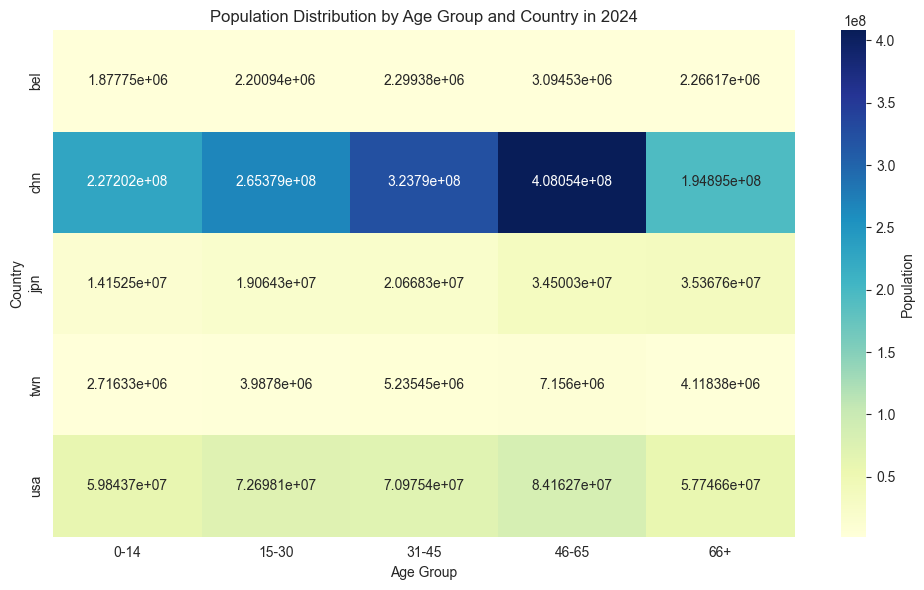

In [8]:
#Use seaborn's heatmap function
age_bins = [0, 14, 30, 45, 65, 100]  
age_labels = ['0-14', '15-30', '31-45', '46-65', '66+']  
filtered = df[df['year'] == 2024]
filtered['age_group'] = pd.cut(filtered['age'], bins=age_bins, labels=age_labels,include_lowest=True, right=True)
age_distribution = filtered.groupby(['country', 'age_group'])['population'].sum().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(age_distribution, annot=True, fmt="g", cmap="YlGnBu", cbar_kws={'label': 'Population'})
#Add clear annotations and labels
plt.title("Population Distribution by Age Group and Country in 2024")
plt.xlabel("Age Group")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

It reveals that Belgium and Taiwan have a relatively even distribution. In China, most people aged in the 46-65 age range; Japan had more population in the 46-65 and 66+ age range; and USA has more people in the 46-65 age range as well.

Create a pair of violin plots comparing the age distributions between two countries in 2020, separated by gender.

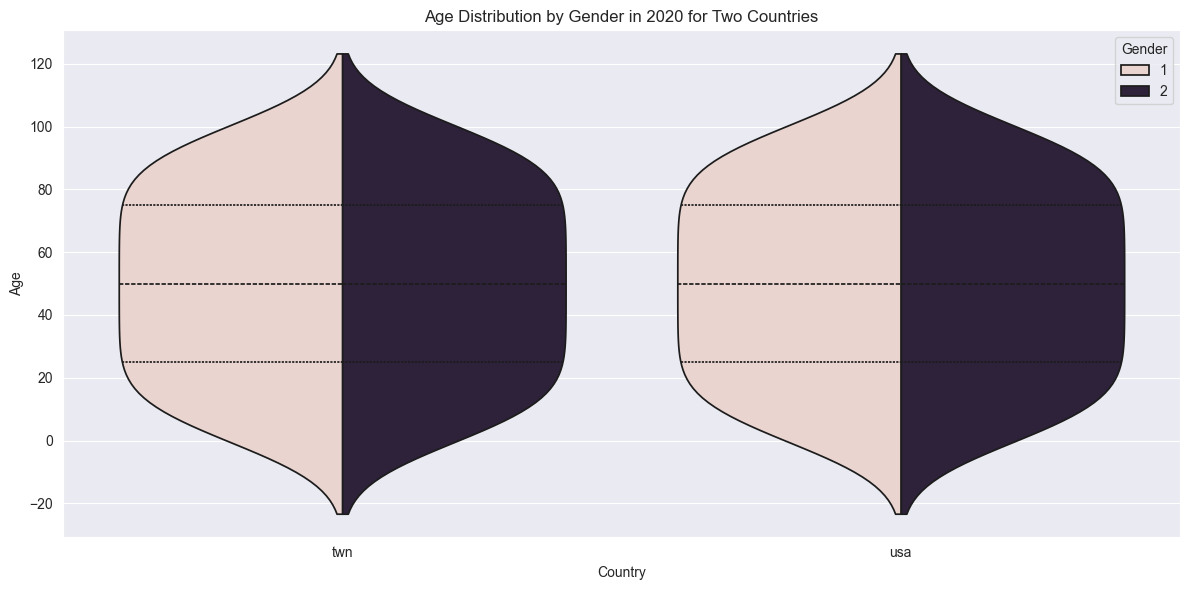

In [9]:
#Create side-by-side violin plots using seaborn
countries = ['twn', 'usa']
filtered = df[(df['year'] == 2020) & (df['country'].isin(countries))]
plt.figure(figsize=(12, 6))
sns.violinplot(x='country', y='age', hue='gender', data=filtered, split=True, inner='quartile')
#Add clear labels and a title
plt.title("Age Distribution by Gender in 2020 for Two Countries")
plt.xlabel("Country")
plt.ylabel("Age")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

We can see that both countries are equally distributed.

Create a pairplot comparing population metrics across four countries:

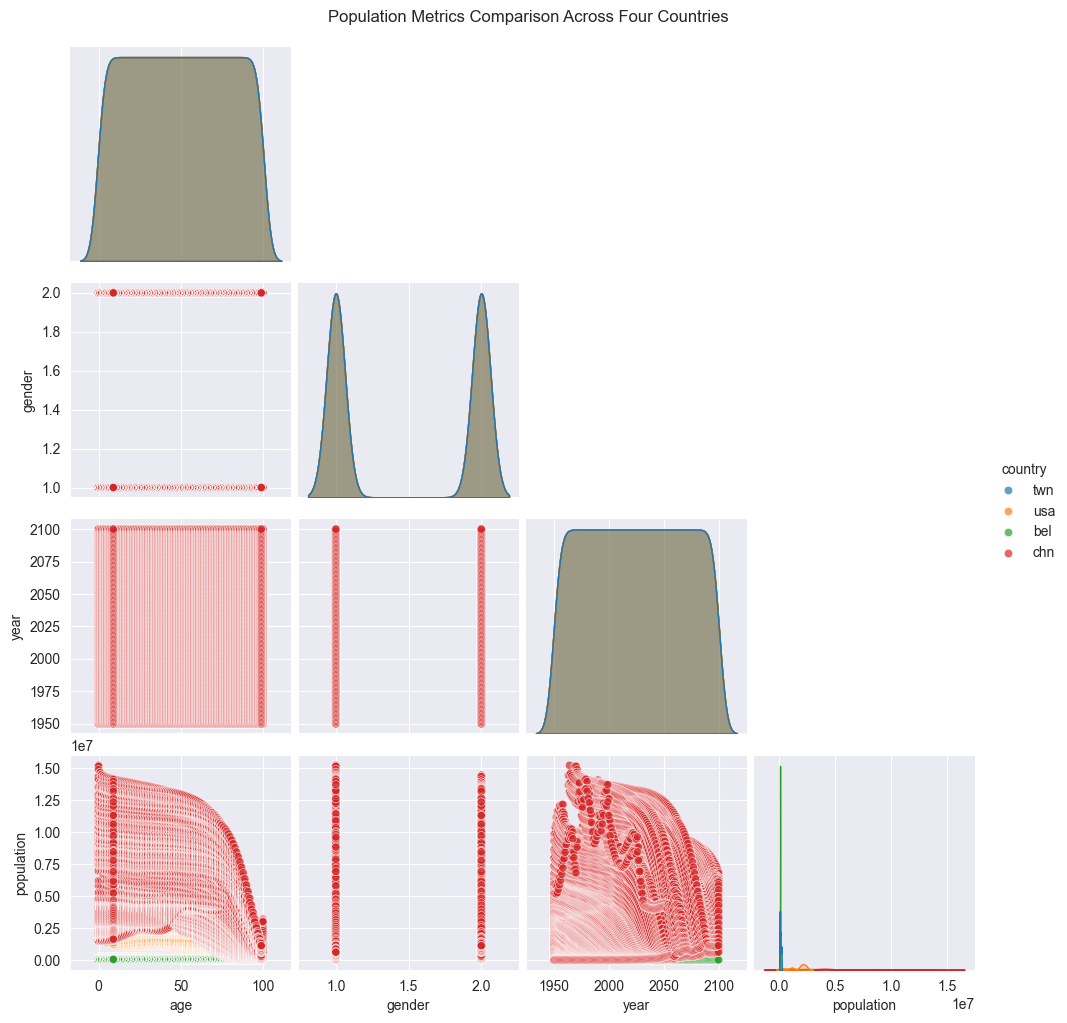

In [10]:
#Select four countries of your choice
countries = ['twn', 'bel', 'usa', 'chn']
filtered = df[df['country'].isin(countries)]
#Use the country as the hue parameter to distinguish between countries
sns.pairplot(filtered, hue='country', corner=True, plot_kws={'alpha': 0.7})
# Add a title to the pair-plot
plt.suptitle("Population Metrics Comparison Across Four Countries", y=1.02)
plt.show()

## Openended Not required

Using plotly dash


In [11]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px
# Sample data preparation (assuming df is already loaded with columns: 'year', 'age', 'population')
# Define age groups
age_bins = [0, 14, 30, 45, 65, 100]
age_labels = ['0-14', '15-30', '31-45', '46-65', '66+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, include_lowest=True)
# Aggregate data to get the population distribution across age groups by year
age_distribution = df.groupby(['year', 'age_group'])['population'].sum().reset_index()
# Initialize the Dash app
app = dash.Dash(__name__)
# App layout
app.layout = html.Div([
    html.H1("Population Distribution Across Age Groups"),
    dcc.Slider(
        id='year-slider',
        min=age_distribution['year'].min(),
        max=age_distribution['year'].max(),
        step=1,
        marks={int(year): str(year) for year in age_distribution['year'].unique()},
        value=age_distribution['year'].min()  # Default to the first year
    ),
    dcc.Graph(id='population-distribution-graph')
])
# Callback to update the graph based on the slider input
@app.callback(
    Output('population-distribution-graph', 'figure'),
    [Input('year-slider', 'value')]
)
def update_graph(selected_year):
    filtered_data = age_distribution[age_distribution['year'] == selected_year]
    fig = px.bar(filtered_data, x='age_group', y='population',
                 labels={'age_group': 'Age Group', 'population': 'Population'},
                 title=f"Population Distribution for {selected_year}",
                 color_discrete_sequence=['#636EFA'])  # Choose color
    fig.update_layout(xaxis_title="Age Group", yaxis_title="Population",
                      title={'x': 0.5, 'xanchor': 'center'})
    return fig
# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

C:\Users\ericy\AppData\Local\Temp\ipykernel_52140\4136695343.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_distribution = df.groupby(['year', 'age_group'])['population'].sum().reset_index()
